In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# fix_yahoo_finance is used to fetch data
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


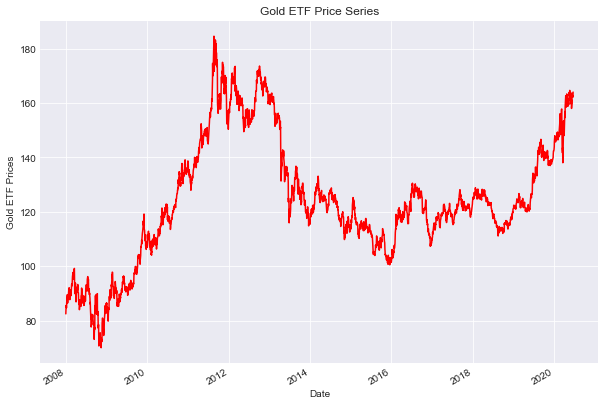

In [2]:
# Read data
Df = yf.download('GLD', '2008-01-01', '2020-6-22', auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [3]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

In [4]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.20 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.43 (constant)


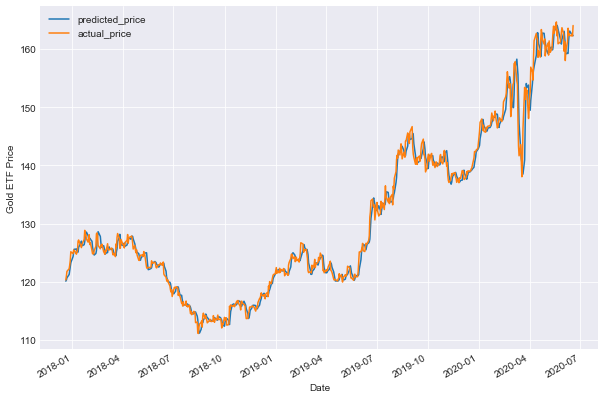

98.86

In [5]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

In [6]:
Df[t:]

,Close,S_3,S_9,next_day_price
Date,,,,
2017-12-20,120.139999,119.896667,119.067779,120.309998
2017-12-21,120.309998,120.089999,119.271111,120.940002
2017-12-22,120.940002,120.463333,119.596667,121.769997
2017-12-26,121.769997,121.006666,119.998889,122.230003
2017-12-27,122.230003,121.646667,120.338889,122.849998
...,...,...,...,...
2020-06-12,162.619995,162.860001,161.227778,162.330002
2020-06-15,162.330002,162.446665,161.197778,162.250000
2020-06-16,162.250000,162.399999,161.492221,162.559998


In [7]:
predicted_price

,price
Date,
2017-12-20,120.094585
2017-12-21,120.285187
2017-12-22,120.667147
2017-12-26,121.237860
2017-12-27,121.937825
...,...
2020-06-12,163.078087
2020-06-15,162.586756
2020-06-16,162.469592


In [6]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

In [7]:
gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)
gold.head()

,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal
Date,,,,,
2017-12-20,120.139999,120.094585,120.309998,0.001415,0
2017-12-21,120.309998,120.285187,120.940002,0.005237,1
2017-12-22,120.940002,120.667147,121.769997,0.006863,1
2017-12-26,121.769997,121.237860,122.230003,0.003778,1
2017-12-27,122.230003,121.937825,122.849998,0.005072,1


In [8]:
gold['real'] = np.where(gold.actual_price_next_day.shift(1) < gold.actual_price_next_day,1,0)
gold.head()

,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal,real
Date,,,,,,
2017-12-20,120.139999,120.094585,120.309998,0.001415,0,0
2017-12-21,120.309998,120.285187,120.940002,0.005237,1,1
2017-12-22,120.940002,120.667147,121.769997,0.006863,1,1
2017-12-26,121.769997,121.237860,122.230003,0.003778,1,1
2017-12-27,122.230003,121.937825,122.849998,0.005072,1,1


In [19]:
#if (gold['signal'].all()^ gold['real'].all() == 1):
gold['loss'] = (gold['signal']^ gold['real']) * (abs(gold.actual_price_next_day.shift(1) - gold.actual_price_next_day))/gold.actual_price_next_day


In [12]:
gold['loss']

Date
2017-12-20         NaN
2017-12-21    0.000000
2017-12-22    0.000000
2017-12-26    0.000000
2017-12-27    0.000000
                ...   
2020-06-12    0.001786
2020-06-15    0.000000
2020-06-16    0.001907
2020-06-17    0.000000
2020-06-18    0.010913
Name: loss, Length: 627, dtype: float64

In [24]:
gold['profit'] = (~(gold['signal']^ gold['real'])) * (abs(gold.actual_price_next_day.shift(1)) - (gold.actual_price_next_day))/gold.actual_price_next_day


In [35]:
total = 100 * np.sum(gold.profit - gold.loss) - (0.1 * len(gold.index))

In [10]:
gold['predicted_price_next_day']

Date
2017-12-20    120.094585
2017-12-21    120.285187
2017-12-22    120.667147
2017-12-26    121.237860
2017-12-27    121.937825
                 ...    
2020-06-12    163.078087
2020-06-15    162.586756
2020-06-16    162.469592
2020-06-17    162.416059
2020-06-18    162.282594
Name: predicted_price_next_day, Length: 627, dtype: float64

In [11]:
gold['actual_price_next_day']

Date
2017-12-20    120.309998
2017-12-21    120.940002
2017-12-22    121.769997
2017-12-26    122.230003
2017-12-27    122.849998
                 ...    
2020-06-12    162.330002
2020-06-15    162.250000
2020-06-16    162.559998
2020-06-17    162.240005
2020-06-18    164.029999
Name: actual_price_next_day, Length: 627, dtype: float64

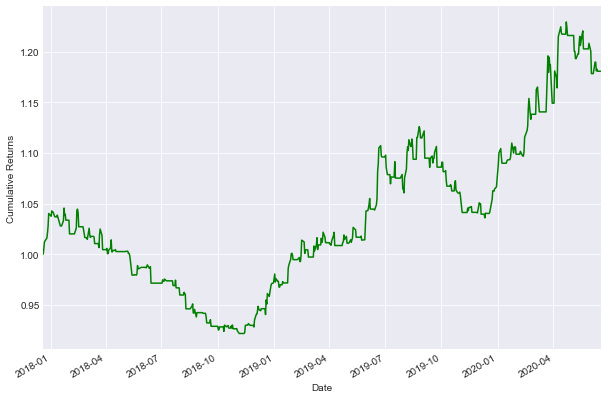

In [83]:
gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

In [81]:
'Sharpe Ratio %.2f' % (gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5))

'Sharpe Ratio 0.75'

# How to use this model to predict daily moves?

In [102]:
data = yf.download('GLD', '2008-06-01', '2020-6-25', auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")
data.tail(7)

[*********************100%***********************]  1 of 1 downloaded


/Users/ishanshah/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/ishanshah/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Volume,S_3,S_9,predicted_gold_price,signal
Date,,,,,,,,,
2020-06-16,161.85,162.69,161.36,162.25,7964000,162.400000,161.492222,162.469593,No Position
2020-06-17,162.00,162.62,161.77,162.56,4752800,162.380000,161.634444,162.416059,No Position
2020-06-18,162.20,162.32,161.44,162.24,5397600,162.350000,162.104444,162.282592,No Position
2020-06-19,162.87,164.09,162.78,164.03,12187400,162.943333,162.583333,162.897612,Buy
2020-06-22,165.06,165.73,164.41,165.09,12385600,163.786667,163.008889,163.824612,Buy
2020-06-23,165.63,166.52,165.52,166.48,12137300,165.200000,163.332222,165.458914,Buy
2020-06-24,166.01,166.99,165.45,165.90,10884200,165.823333,163.722222,166.128458,Buy
